# 🕹️ 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
##### [사용할 라이브러리]
- 라이브러리가 영어로 도서관을 의미하는데, 파이썬 라이브러리도 똑같습니다.
- 도서관에서 numpy, pandas와 같은 책들을 골라서 사용하는거죠.
- 이 책 안에는 힘들게 구현하지 않아도 되는 정보를 제공해줍니다.
1. numpy - 자료를 정리하는 역할
2. pandas - 자료를 정리하는 역할
3. matplotlib - 그래프를 그리는 역할
4. warnings - 경고 메세지에 대해서 다루는 역할
&nbsp;
##### [프로그램 분석]
- 전반적으로 봤을 때, 해당 모델은 훈련데이터셋과 테스트셋으로 나누지 않았습니다.
- 그래서 훈련셋으로 훈련시킨후, 다시 훈련셋에 대한 예측을 하면 당연히 1이 나와야 정상입니다. (이를 과적합:overfitting이라고 합니다.)
- 여기서는 일단 KNeighborsClassifier의 동작법만 알아도 큰 도움이 될 것 같습니다.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings('ignore') # KNeighbors Classifier를 불러오게 되면 경고가 뜰 수 있어 무시하는 코드입니다.

In [36]:
# 도미의 데이터를 넘파이 array로 불러옵니다.
bream_length = np.array([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0])
bream_weight = np.array([242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0])

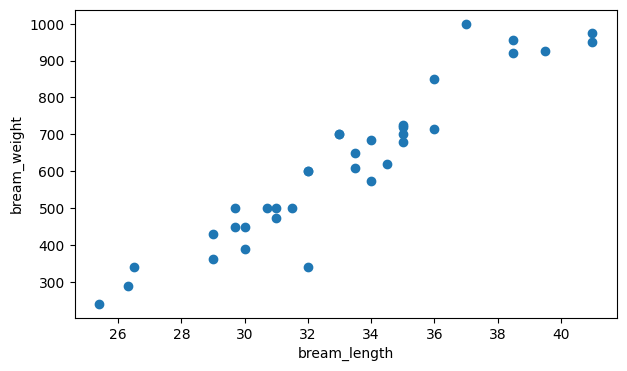

In [37]:
# 도미길이, 도미무게 그래프
plt.figure(figsize=(7, 4)) # figure를 통해서 그래프의 크기를 조절
plt.scatter(bream_length, bream_weight) # x, y에 대한 데이터를 산점도로 묘사
plt.xlabel('bream_length') # x축의 값
plt.ylabel('bream_weight') # y축의 값
plt.show() # 그래프 묘사 함수

In [38]:
# 빙어 데이터를 넘파이 array로 받는다.
smelt_length = np.array([9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])
smelt_weight = np.array([6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])

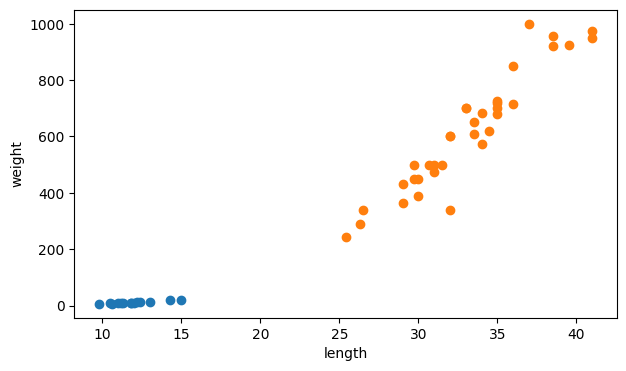

In [39]:
# 도미와 빙어 그래프
plt.figure(figsize=(7, 4))
plt.scatter(smelt_length, smelt_weight)
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [42]:
# 같은 문자열 리스트이므로 합칠 수 있습니다.
## concatenate 함수는 해당 배열을 가로 합친다는 의미이고 괄호는 두게를 써주셔야합니다.
### 그리고 concatenate와 비슷하지만 다른 함수로는 column_stack이 있는데 가로가 아닌 세로로 데이터를 받습니다.
length = np.concatenate((bream_length, smelt_length))
weight = np.concatenate((bream_weight, smelt_weight))

In [43]:
# 해당 배열을 DataFrame의 형태로 받습니다.
fish_data = pd.DataFrame({'length':length, 'weight':weight})

In [44]:
fish_data.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [45]:
# 결과값을 입력받습니다.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [46]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# KNeighborsClassfier는 이름처럼 분류 모델입니다.
## 기본적인 n_neighbors의 값은 5이지만, 3으로 바꾸었습니다.
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=3)

In [48]:
# score 값은 원래 훈련데이터로 하지 않고 테스트데이터를 사용해야하지만 여기서는 이렇게 사용했습니다.
knc.score(fish_data, fish_target)

1.0

In [49]:
# 길이가 30, 무게가 600인 생선에 대한 예측값입니다.
knc.predict([[30, 600]])

array([1.])

In [50]:
# 해당 모델에 훈련되어있는 x값, 독립변수 값입니다.
knc._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [51]:
# 해당 모델에 학습된 y값, 종속변수의 값입니다.
knc._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])